## Die Poisson-Verteilung - ein Beispiel
----------------------------------------

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import poisson

Wenden wir die Poisson-Verteilung in Form eines Beispiels an. Wir konzentrieren uns auf das <a href="https://en.wikipedia.org/wiki/100-year_flood">Jahrhunderthochwasser</a>, ein Konzept, das im Flussbau häufig zur Planung von Hochwasserschutzmaßnahmen verwendet wird.

Erinnern wir uns an die mathematische Notation einer **Poisson-Zufallsvariablen**:

$$ P(X = x) = e^{-\lambda}\frac{\lambda^x}{x!}, \qquad x = 0, 1, 2, \dots ,  $$

wobei $\lambda$ eine positive reelle Zahl ist, die die durchschnittliche Anzahl der Ereignisse während eines festen Zeitintervalls darstellt, und $e≈2,7182818$.

Das *Jahrhunderthochwasser* ist eine Kurzbezeichnung für ein Hochwasser mit einer jährlichen Überschreitungswahrscheinlichkeit von $1 \%$ und einem durchschnittlichen Wiederholungsintervall von $100$ Jahren. Der Begriff kann jedoch für Menschen irreführend sein, denn sie stellen sich vor, dass der Begriff Hochwasser beschreibt, die einmal alle $100$ Jahre auftreten. Dies ist jedoch nicht der Fall. Ein Hochwasser mit einer jährlichen Überschreitungswahrscheinlichkeit von $1 \%$ bedeutet, dass in **jedem** einzelnen Jahr mit einer Wahrscheinlichkeit von $0,01$ ein Hochwasser in einer Größenordnung auftritt, die einem Jahrhunderthochwasser entspricht.

Im Rahmen einer Poisson-Verteilung wird der Erwartungswert $E(x)=\lambda$ eines solchen Hochwassers während des festen Intervalls von $100$ Jahren auf $\lambda=100×0,01=1$ gesetzt. Die Poisson-Zufallsvariable $X$ ist also die Anzahl der Ereignisse, die natürlich je nach Fragestellung verschiedene Werte annehmen kann. Wir können uns für die Wahrscheinlichkeit interessieren, dass ein solches Hochwasserereignis während des $100$-Jahres-Intervalls nicht auftritt, $P(x=0)$, oder wir wollen die Wahrscheinlichkeit wissen, dass ein solches Hochwasserereignis genau einmal während des $100$-Jahres-Intervalls auftritt, also $P(x=1)$, oder wir wollen die Wahrscheinlichkeit wissen, dass zwei oder mehr solcher Hochwasserereignisse während des $100$-Jahres-Intervalls auftreten, also $P(x≥2)$. Setzt man diese Werte in die obige Gleichung ein, so erhält man

$\lambda = 1, x = 0,1,2,\dots ,n$

$$P(X = 0) = e^{-1}\frac{1 \times 0}{0!}, \qquad \text{für } \  x = 0$$

$$P(X = 1) = e^{-1}\frac{1 \times 1}{1!}, \qquad \text{für } \  x = 1$$

$$ P(X \ge 2) = \sum_{i=2}^n e^{-1}\frac{1 \times x_i}{x_i!}, \qquad  \text{für } \  x_i = 2,3,\dots ,n $$

Wir wenden uns an Python, um die Berechnungen durchzuführen. Wir werden die Funktionen `poisson.pmf` und `poisson.cdf` verwenden.

In [4]:
x_0=poisson.pmf(0,1)
x_0

0.36787944117144233

In [5]:
x_1=poisson.pmf(1,1)
x_1

0.36787944117144233

In [6]:
xge2 = 0
for i in range(2,100):
    xge2 += poisson.pmf(i, 1)
xge2

0.26424111765711533

Die Ergebnisse zeigen, dass die Wahrscheinlichkeit, dass während eines Zeitraums von $100$ Jahren kein Hochwasser $P(X=0)$ in einer Größenordnung auftritt, die einem Jahrhunderthochwasser entspricht, $0,37 $ beträgt, was interessanterweise genauso wahrscheinlich ist wie das Auftreten von genau einem Hochwasser $P(X=1)$. Die Wahrscheinlichkeit, dass zwei oder mehr $P(X≥2)$ solcher Hochwasserereignisse innerhalb des $100$-Jahres-Intervalls auftreten, ist $0,26$ und damit geringer. Beachten Sie jedoch, dass die Wahrscheinlichkeit, dass zwei oder mehr $P(X≥2)$ solcher Hochwasserereignisse während des 100-Jahres-Intervalls eintreten, etwa $26 \%$ beträgt!

Zur Überprüfung der Richtigkeit addieren wir die Wahrscheinlichkeiten $P(x=0), P(x=1)$ und $P(x≥2)$, was $1$ ergeben sollte,

In [7]:
x_0 + x_1 + xge2

1.0

Zur besseren Veranschaulichung stellen wir die Wahrscheinlichkeiten der Poisson-Zufallsvariablen $x=0,1,2,3,4,≥5$ dar.

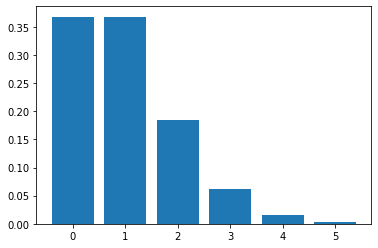

In [10]:
# Erzeuge Bar plot:
height = [x_0,x_1,x_2,x_3,x_4,x_5]
bars = (0,1,2,3,4,5)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)

# Erzeuge Namen auf x- Achse
plt.xticks(y_pos, bars)
plt.show()